In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from glob import glob
from pandas import DataFrame
import io
import json

sns.set_style("white")

In [4]:
'''defines glob object which has all of the files to be under data folder and have filepath of bigwig_intronic/huandy_ and then other.
'''
files = glob("data/bigwig_intronic/huandy_*")


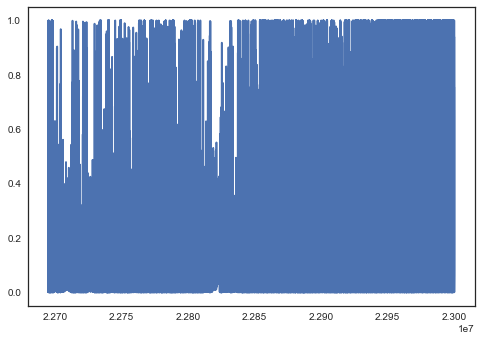

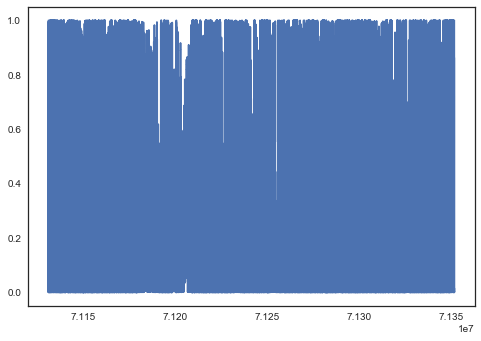

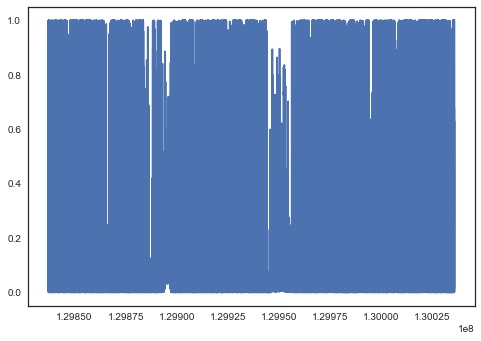

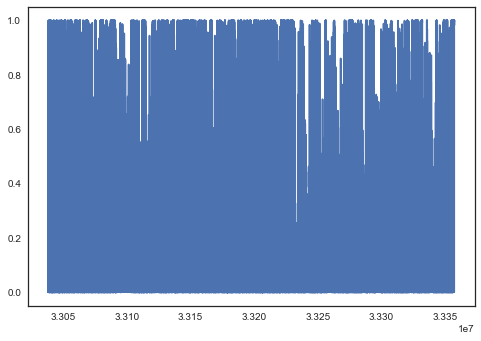

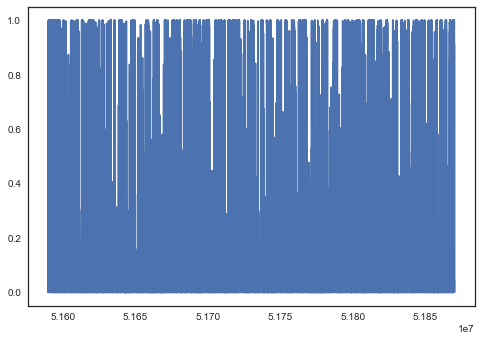

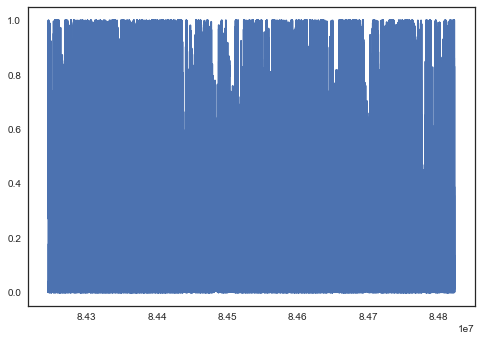

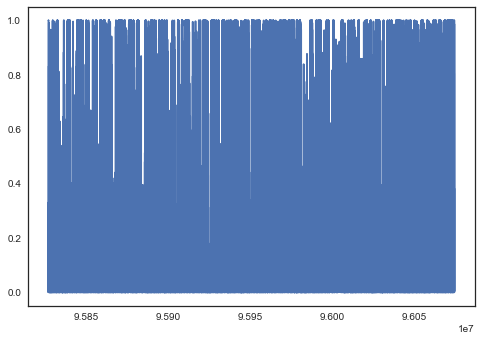

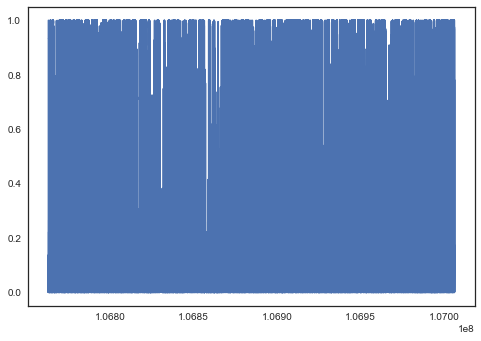

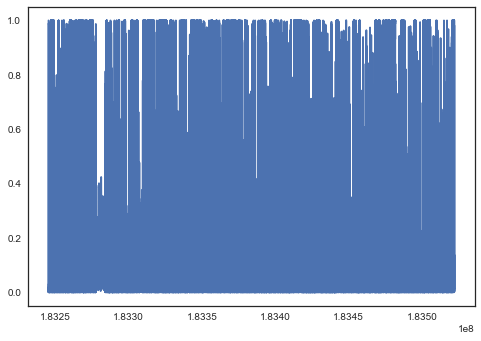

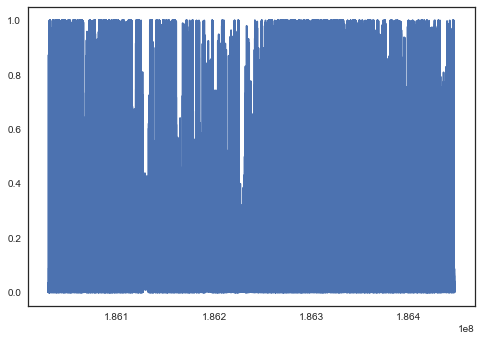

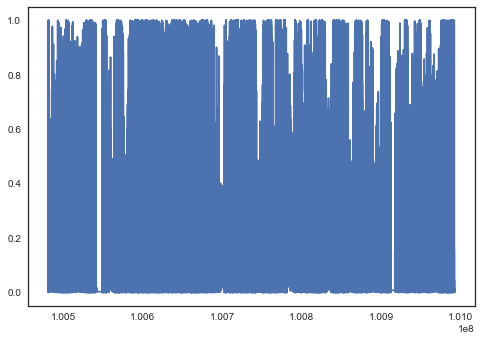

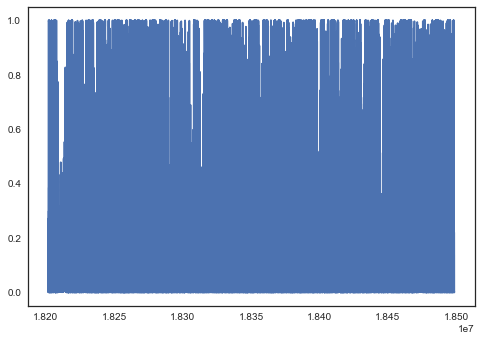

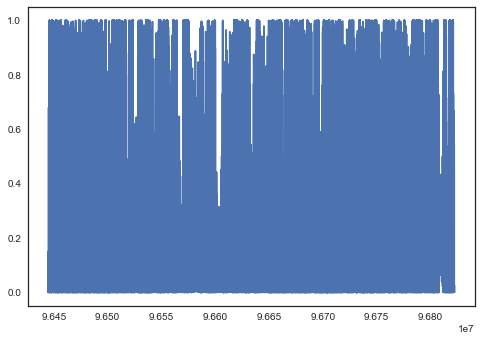

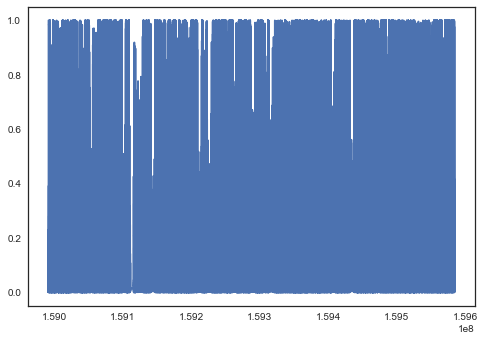

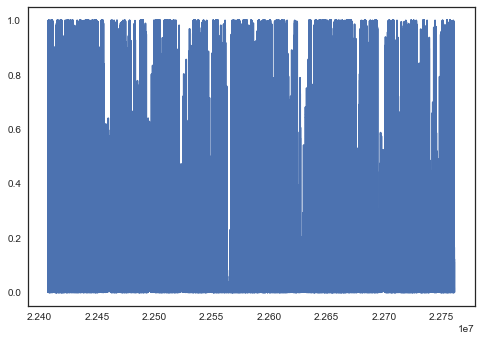

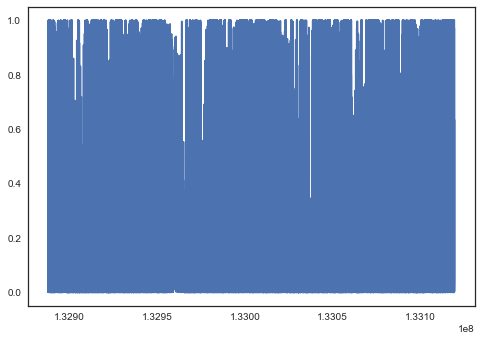

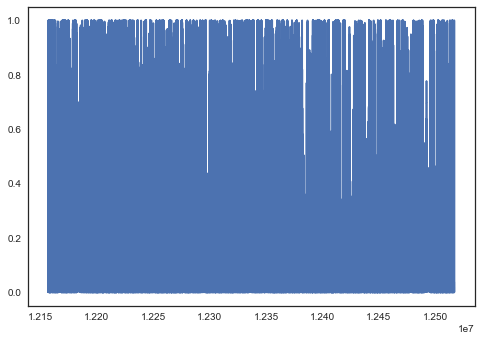

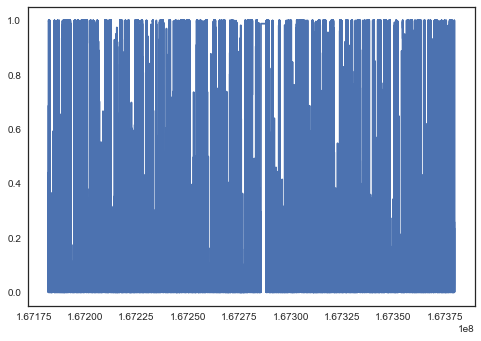

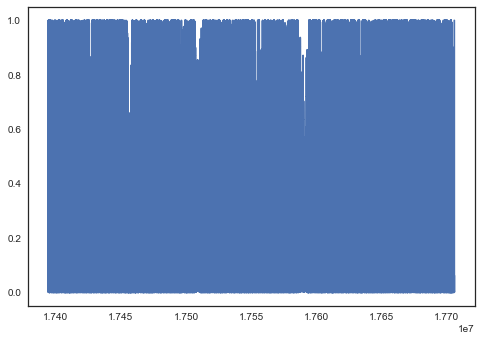

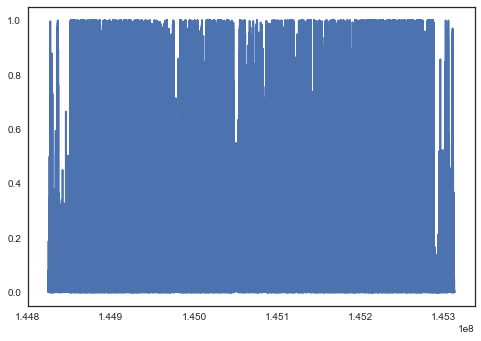

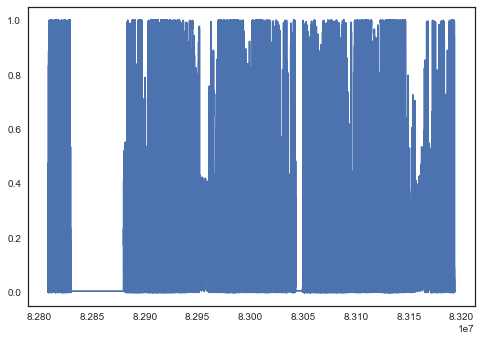

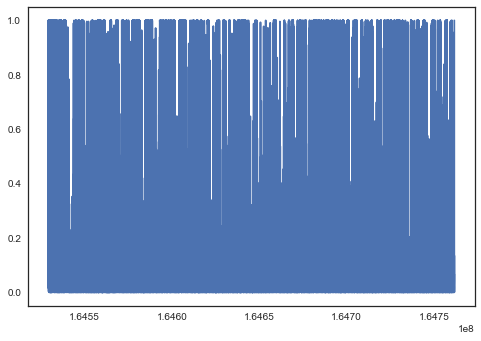

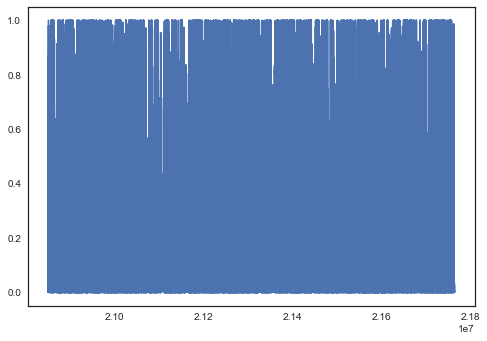

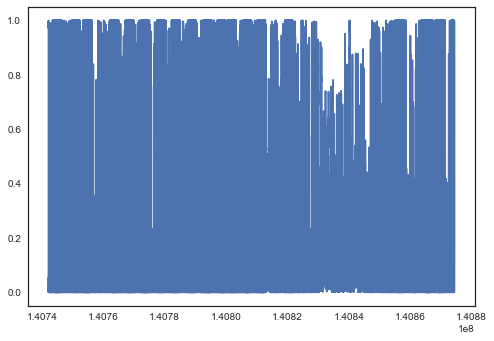

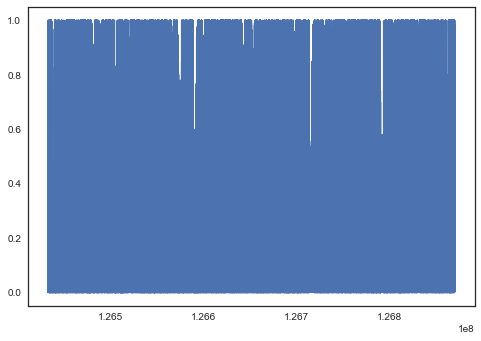

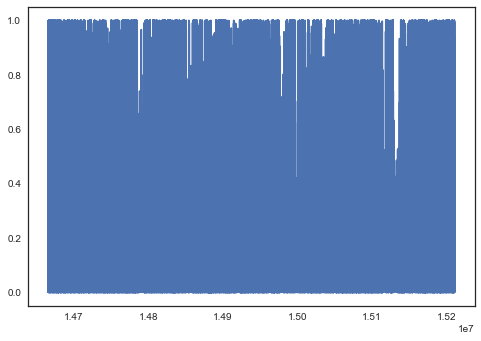

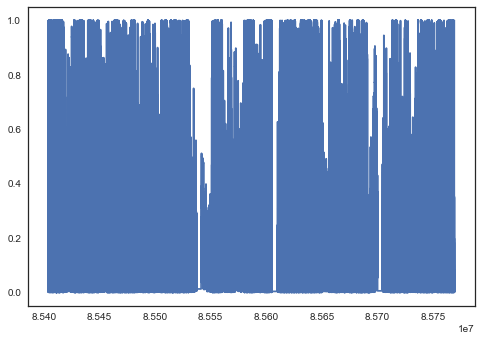

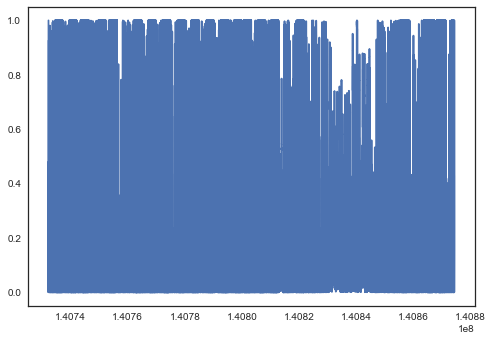

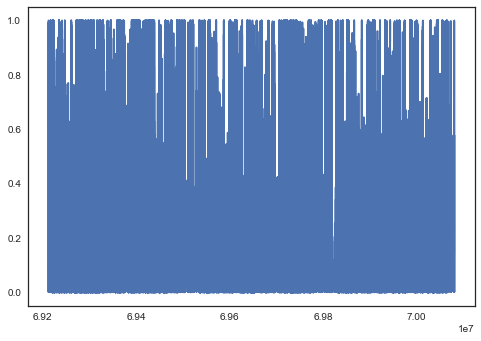

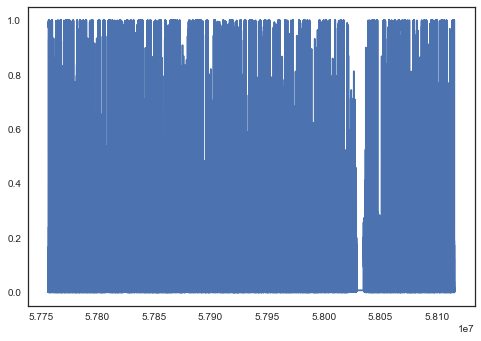

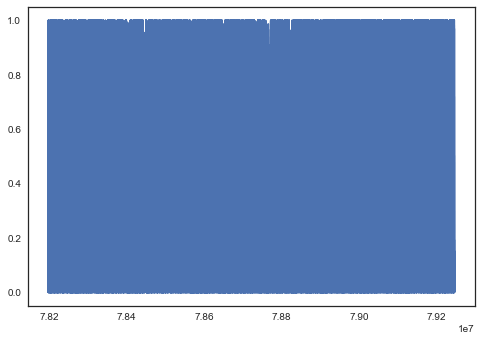

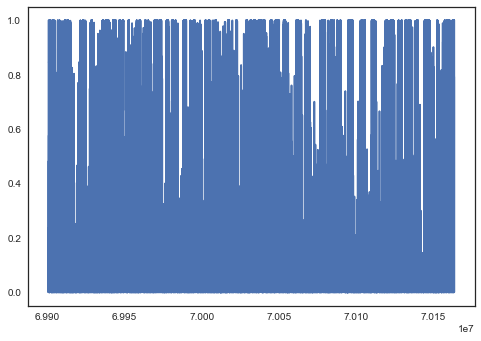

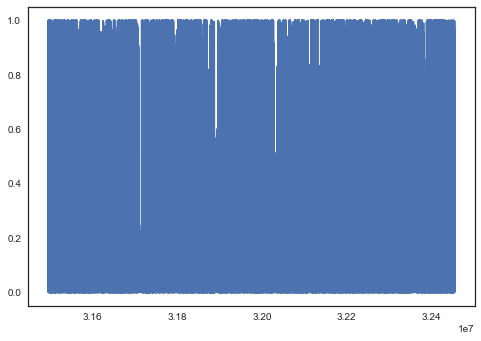

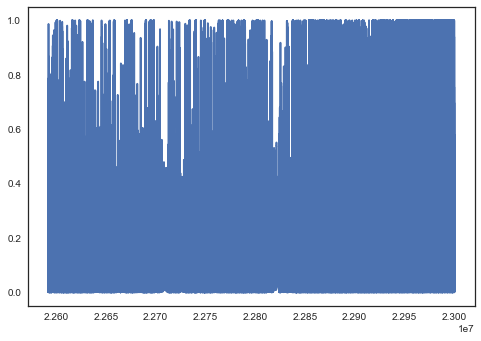

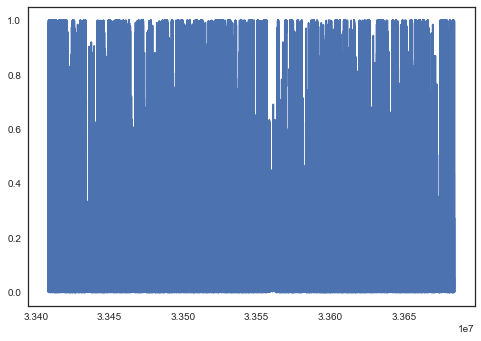

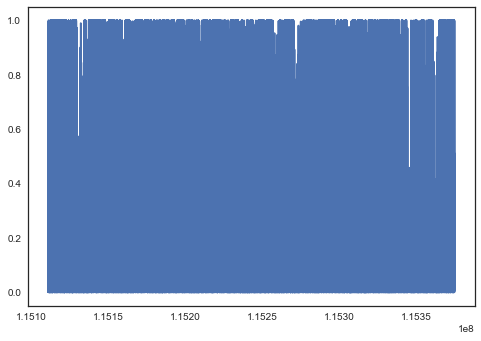

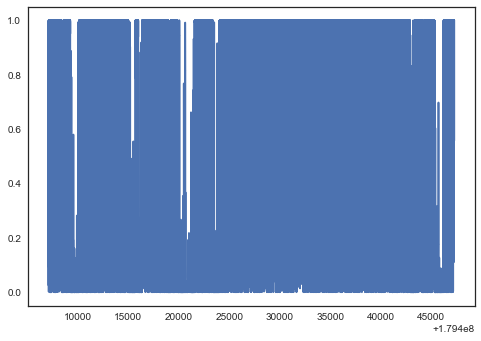

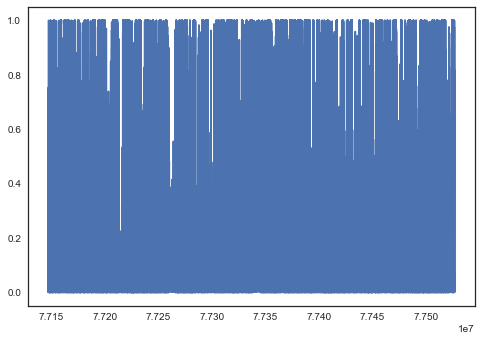

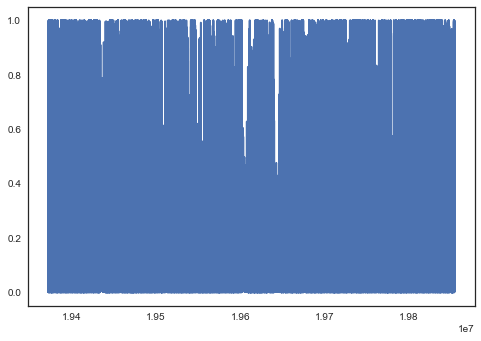

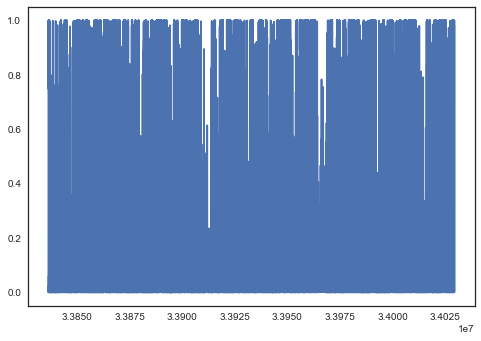

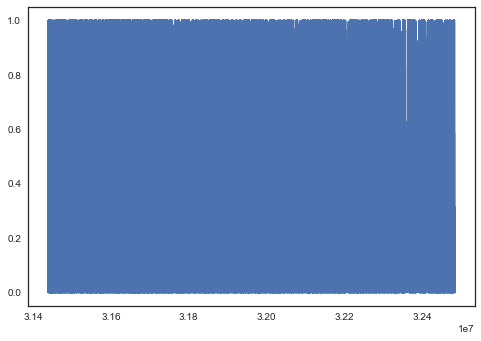

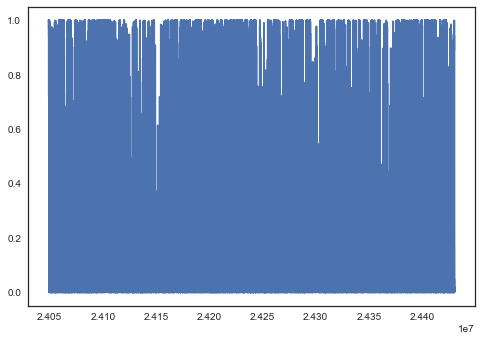

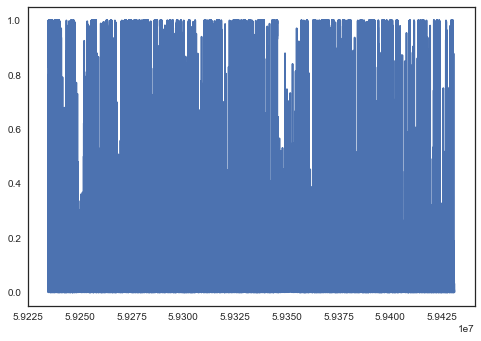

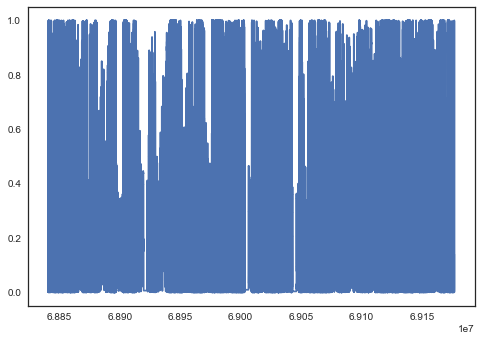

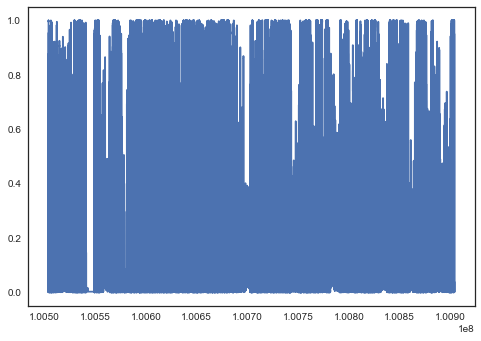

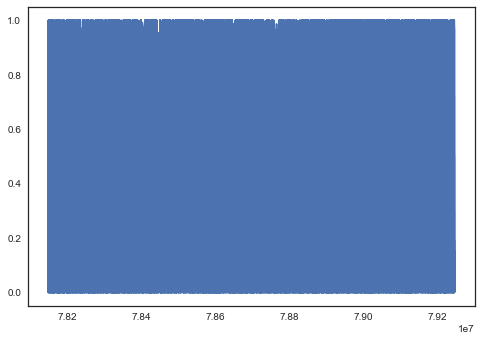

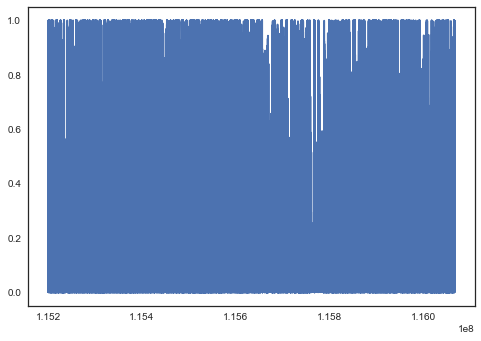

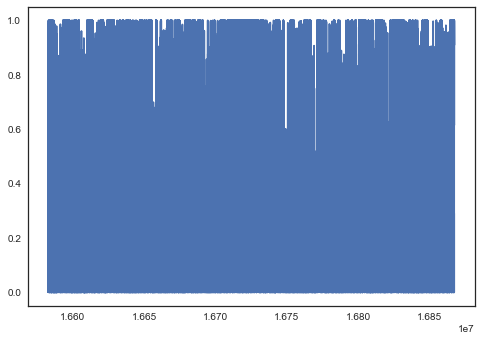

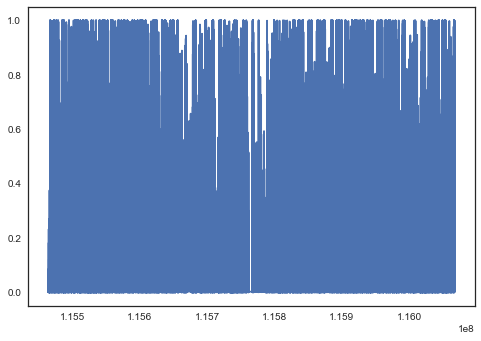

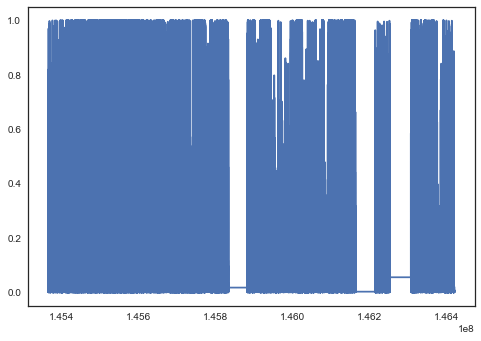

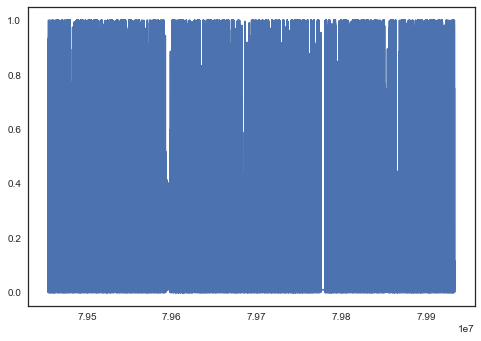

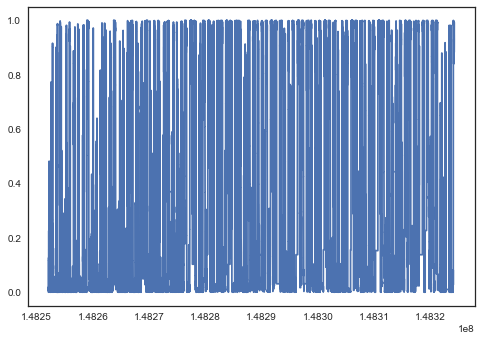

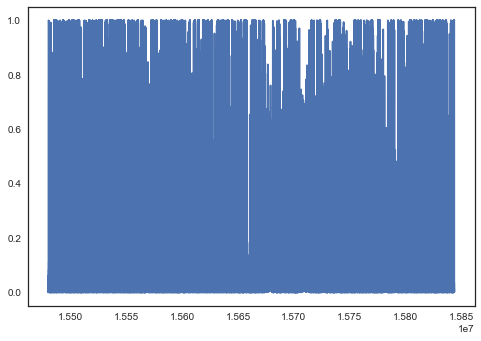

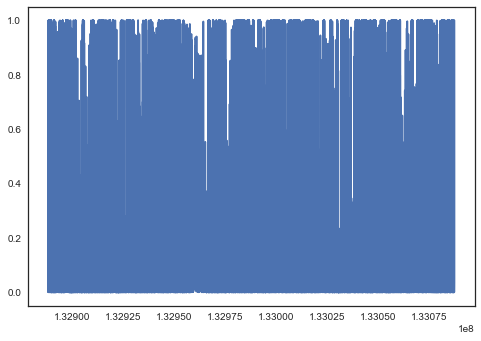

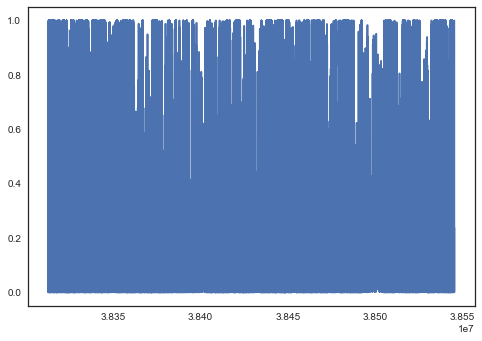

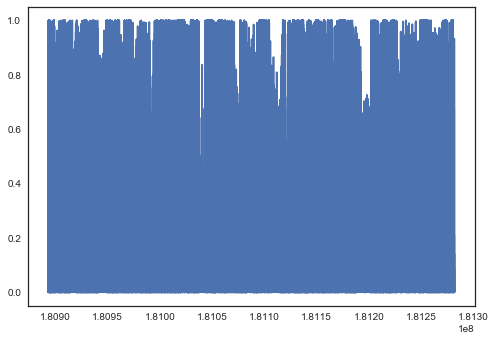

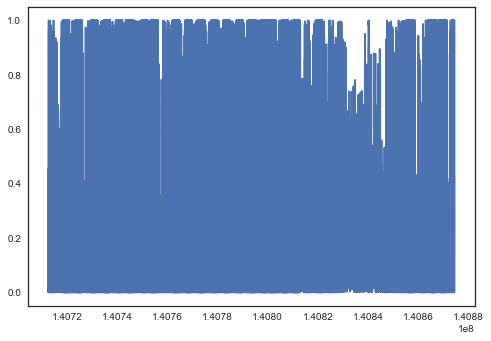

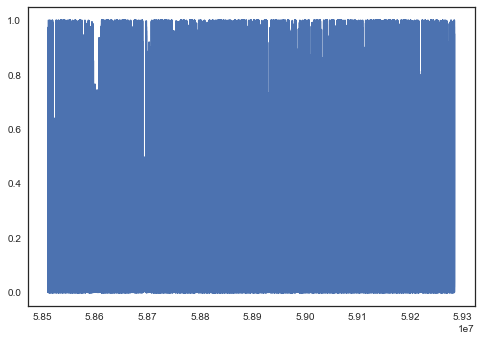

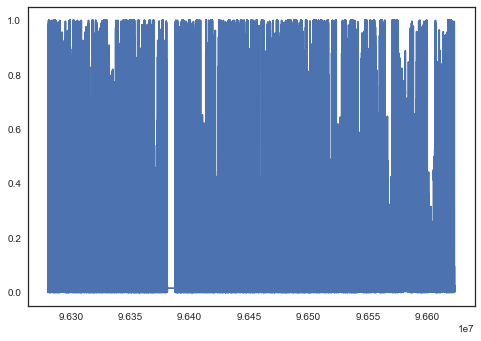

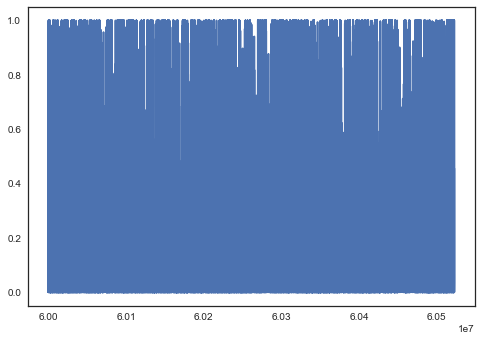

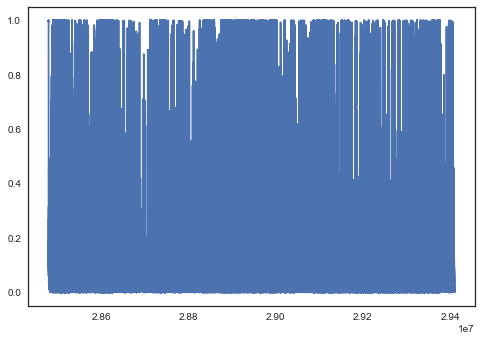

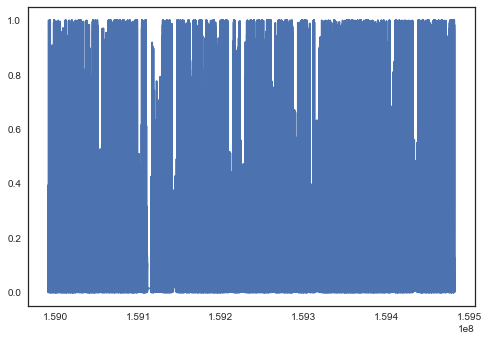

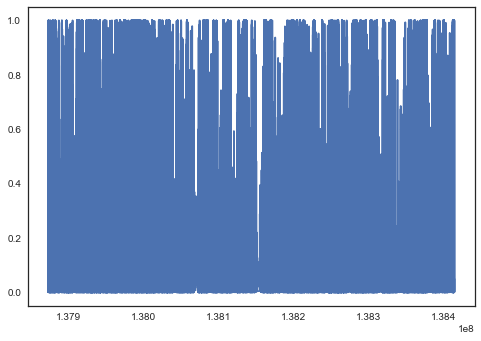

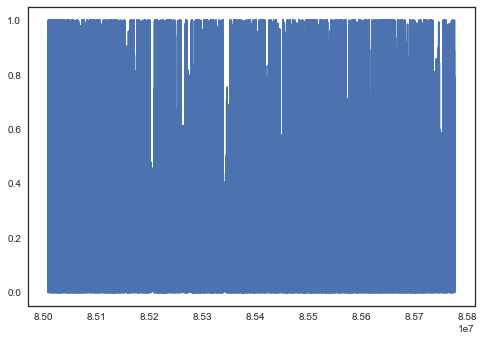

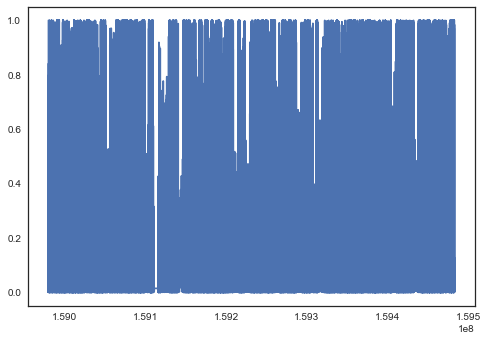

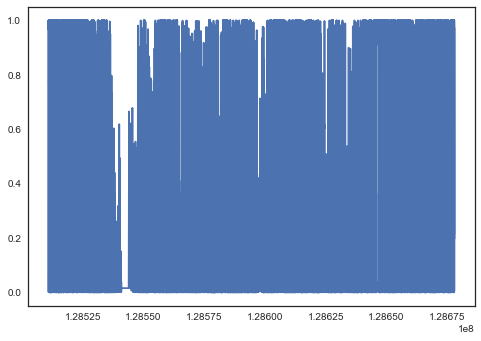

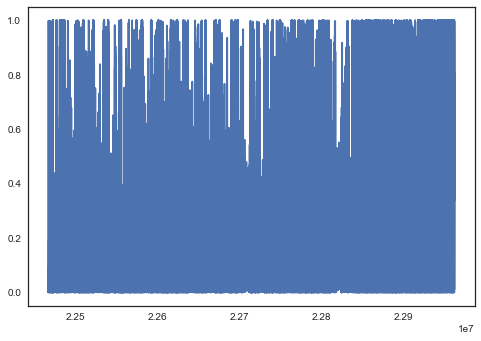

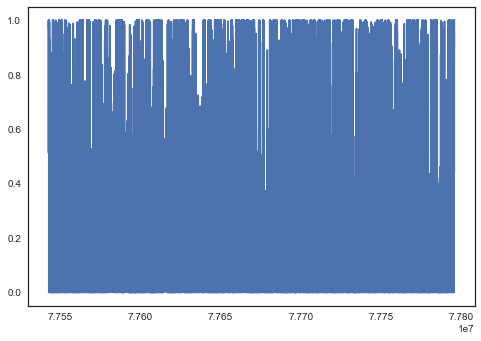

In [ ]:

hcc_dict = dict()
'''loop through each file in glob object files and read its columns into table named region. 
Then take the ones with conservation greater than 0.75 and move into hcc.'''
for f in files:
    region = pd.read_table(f,names=["chromosome","start","end","conservation"])
    BPNum=region.end-region.start
    hcc = region.conservation>= 0.9
    '''convert table hcc into a list'''
    hcc_list= hcc.tolist()
    '''Identify peaks by counting how many base pairs in each region with conservation score greater than 0.75'''
    PeakNum = hcc_list.count(True)
    Density = PeakNum/BPNum
    '''Then output the regions with more than 1000 of the peaks into a dictionary '''
    if PeakNum>=10000:
        '''hcc_dict[f] = PeakNum'''
        hcc_dict[f] = Density
        plt.step(region["start"],region["conservation"])
        plt.show()
'''Write output of dictionary into a local file'''
with open('hcc_dict_output.txt', 'w') as file:
     file.write(json.dumps(hcc_dict))